In [4]:
# Set the figure size - handy for larger output
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [8, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

In [5]:
from gdeltdoc import GdeltDoc, Filters
from datetime import date
import pandas as pd
pd.set_option('display.max_colwidth', None)


gd = GdeltDoc()

#Function provides GDELT articles & timeline of avg. tone between start and end date
##it is not limited to 3 months data 

def get_data(keyword, start_date, end_date):
    dates = pd.date_range(start_date, end_date, freq='3MS').strftime("%Y-%m-%d").tolist()
    dates.pop(0)
    all_res = []
    timeline_res =[]
    for date in dates: 
        set_filters = Filters(
            keyword = keyword,
            start_date = start_date,
            end_date = date
        )
        all_res.append(gd.article_search(set_filters))
        timeline_res.append(gd.timeline_search("timelinetone", set_filters))
    articles_df = pd.concat(all_res, ignore_index=True).drop_duplicates(ignore_index=True)
    timeline_df = pd.concat(timeline_res, ignore_index=True).drop_duplicates(ignore_index=True)
    return(articles_df, timeline_df)

In [5]:
#Getting all the data from 2017 till now for 3 keywords
articles1, timeline1 = get_data("Site C, Khayelitsha", "2017-01-01", "2023-02-01")
articles2, timeline2 = get_data("Site C in Khayelitsha", "2017-01-01", "2023-02-01")
articles3, timeline3 = get_data("Khayelitsha Site C", "2017-01-01", "2023-02-01")

KeyboardInterrupt: 

In [74]:
#saving them to file
articles1.to_csv('articles1.csv')
articles2.to_csv('articles2.csv')
articles3.to_csv('articles3.csv')

timeline1.to_csv('timeline1.csv')
timeline2.to_csv('timeline2.csv')
timeline3.to_csv('timeline3.csv')

In [3]:
#keyword "Site C, Khayelitsha" has the most number of articles
#parenrhesis in keyword doesnt make a difference
print(len(articles1))
print(len(articles2))
print(len(articles3))

373
112
77


In [4]:
articles1.head()

,url,url_mobile,title,seendate,socialimage,domain,language,sourcecountry
0,http://allafrica.com/stories/201701060673.html,,South Africa : Suspects Arrested for Business Robbery in Khayelitsha,20170106T163000Z,,allafrica.com,English,Nigeria
1,http://www.saps.gov.za/newsroom/msspeechdetail.php?nid=9848,,Services,20170106T091500Z,,saps.gov.za,English,South Africa
2,http://allafrica.com/stories/201703010657.html,,Somalia : Top Army Officer Escapes an Assassination Attempt,20170301T141500Z,,allafrica.com,English,Nigeria
3,https://www.saps.gov.za/newsroom/msspeechdetail.php?nid=10525,,Services,20170317T141500Z,,saps.gov.za,English,South Africa
4,http://allafrica.com/stories/201702020630.html,,South Africa : 26 Year Old Suspect Arrested for Possession of Firearm Without a Licence and Illegal Possession of Ammunition in Khayelitsha,20170202T184500Z,,allafrica.com,English,Nigeria


## Tone timeline analysis

In [76]:
timeline1.head()

,datetime,Average Tone
0,2017-01-01 00:00:00+00:00,0.0
1,2017-01-02 00:00:00+00:00,0.0
2,2017-01-03 00:00:00+00:00,0.0
3,2017-01-04 00:00:00+00:00,0.0
4,2017-01-05 00:00:00+00:00,0.0


<AxesSubplot:xlabel='datetime'>

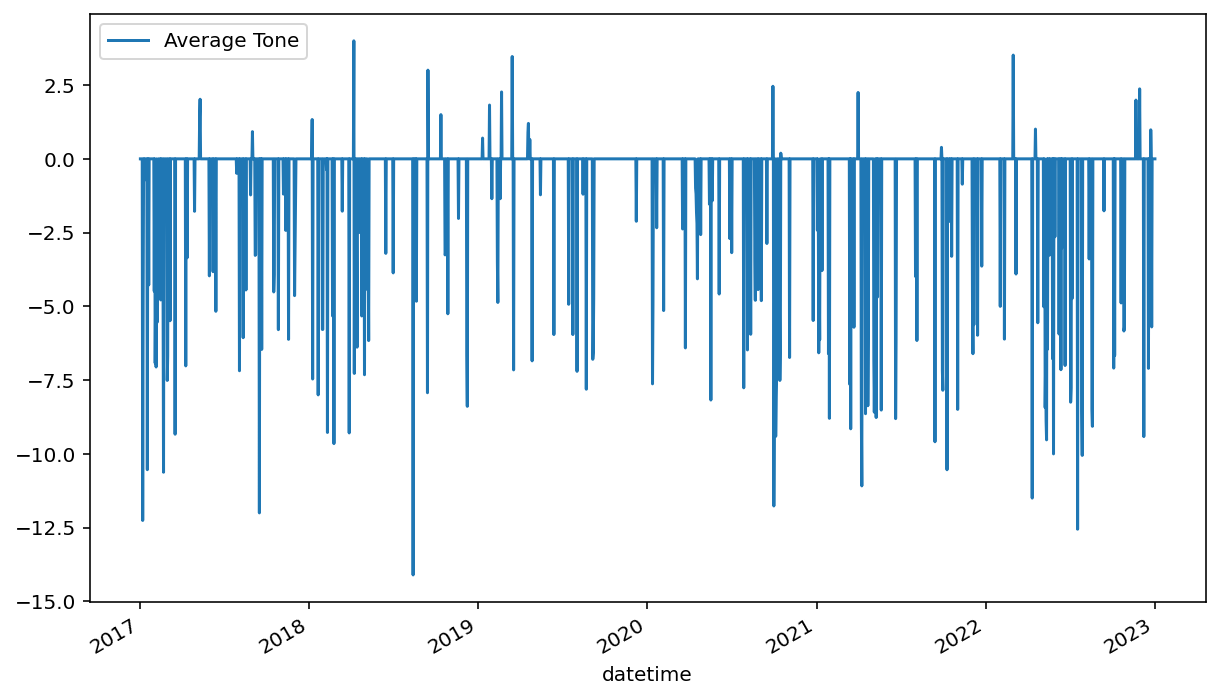

In [77]:
timeline1.plot('datetime', 'Average Tone')

In [78]:
len(timeline1[timeline1['Average Tone'] > 0])*100/len(timeline1) #perc of positive avg tones

1.0507080858839652

<AxesSubplot:xlabel='datetime'>

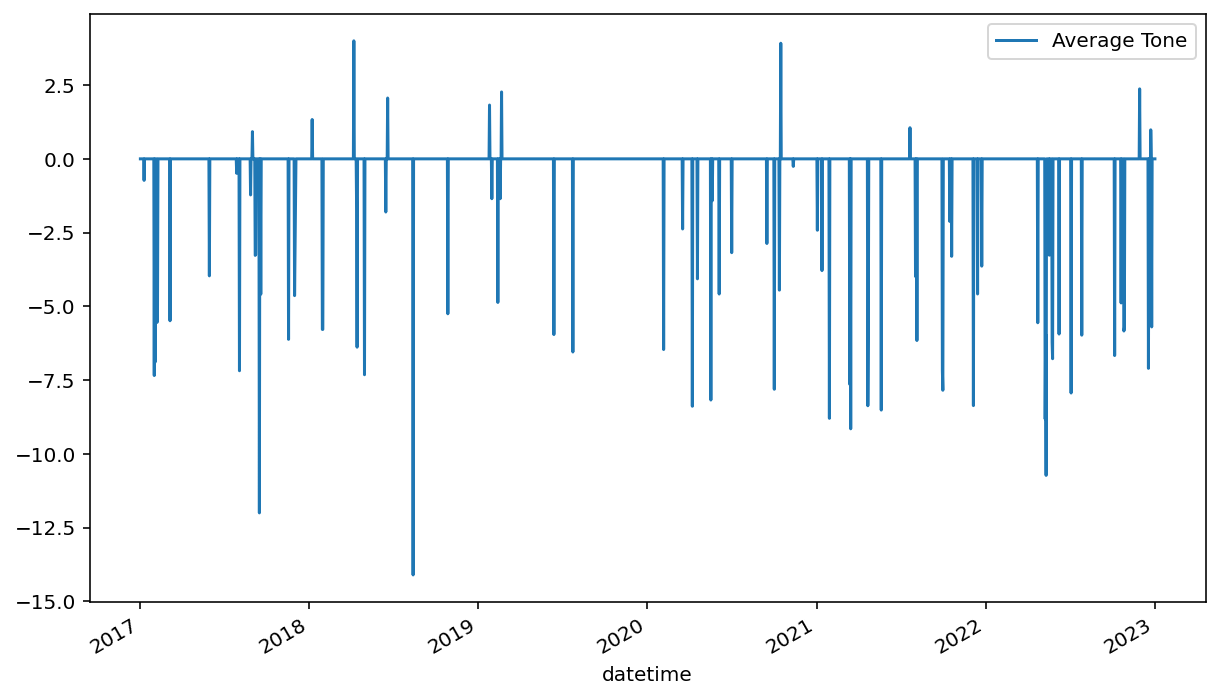

In [79]:
timeline2.plot('datetime', 'Average Tone')

In [80]:
len(timeline2[timeline2['Average Tone'] > 0])*100/len(timeline2) #perc of positive avg tones

0.4568296025582458

<AxesSubplot:xlabel='datetime'>

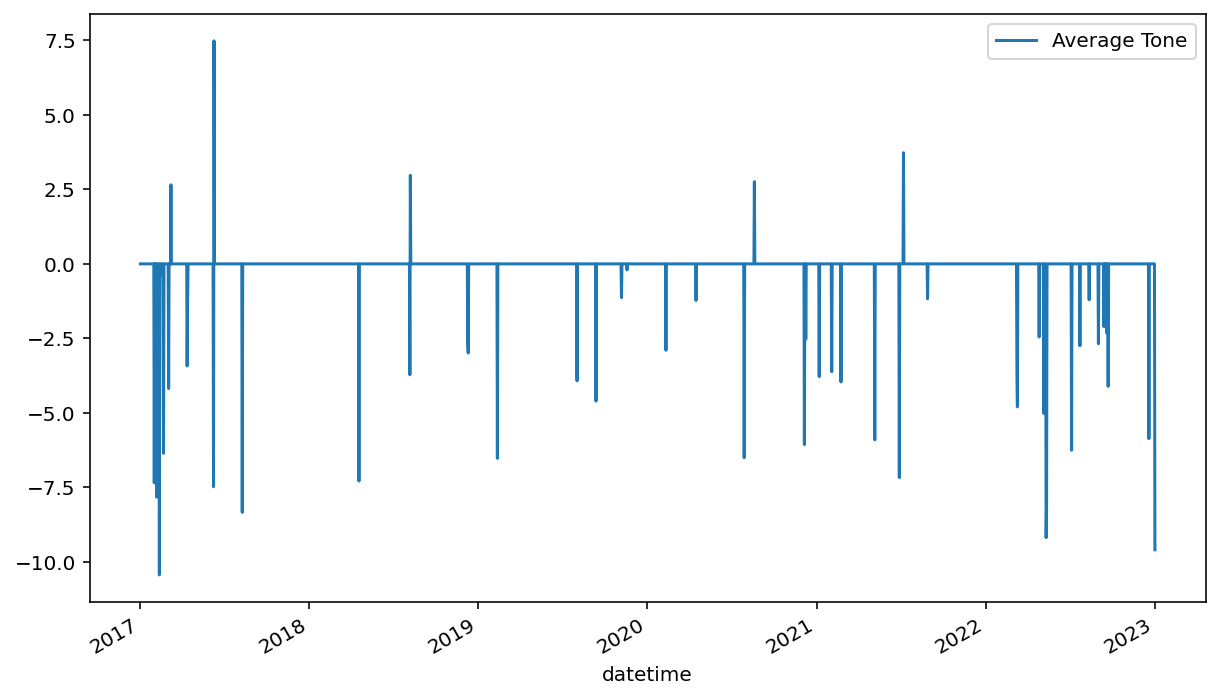

In [81]:
timeline3.plot('datetime', 'Average Tone')

In [82]:
len(timeline3[timeline3['Average Tone'] > 0])*100/len(timeline3) #perc of positive avg tones

0.2284148012791229

## Combine Articles from approach 1

In [5]:
df = pd.concat([articles1, articles2, articles3], ignore_index=True, sort=True)
len(df)

562

In [6]:
df.drop_duplicates(ignore_index=True, inplace = True)
len(df)

448

In [6]:
562-448 #duplicates articles = articles with multiple keywords

114

In [7]:
df.head()

,domain,language,seendate,socialimage,sourcecountry,title,url,url_mobile
0,allafrica.com,English,20170106T163000Z,,Nigeria,South Africa : Suspects Arrested for Business Robbery in Khayelitsha,http://allafrica.com/stories/201701060673.html,
1,saps.gov.za,English,20170106T091500Z,,South Africa,Services,http://www.saps.gov.za/newsroom/msspeechdetail.php?nid=9848,
2,allafrica.com,English,20170301T141500Z,,Nigeria,Somalia : Top Army Officer Escapes an Assassination Attempt,http://allafrica.com/stories/201703010657.html,
3,saps.gov.za,English,20170317T141500Z,,South Africa,Services,https://www.saps.gov.za/newsroom/msspeechdetail.php?nid=10525,
4,allafrica.com,English,20170202T184500Z,,Nigeria,South Africa : 26 Year Old Suspect Arrested for Possession of Firearm Without a Licence and Illegal Possession of Ammunition in Khayelitsha,http://allafrica.com/stories/201702020630.html,


## Approach 2: get articles from seperate keyword search

In [7]:
articles4, timeline4 = get_data("Site C", "2017-01-01", "2023-02-01")
articles5, timeline5 = get_data("Khayelitsha", "2017-01-01", "2023-02-01")

In [16]:
print(len(articles4))
print(len(articles5))

5998
5985


In [7]:
#saving them to file
articles4.to_csv('articles4.csv')
articles5.to_csv('articles5.csv')

timeline4.to_csv('timeline4.csv')
timeline5.to_csv('timeline5.csv')

In [9]:
articles5.head()

,url,url_mobile,title,seendate,socialimage,domain,language,sourcecountry
0,https://www.saps.gov.za/newsroom/msspeechdetail.php?nid=10239,,Services,20170220T080000Z,,saps.gov.za,English,South Africa
1,https://wn.com/Khayelitsha,,Khayelitsha,20170216T154500Z,https://i.ytimg.com/vi/4tTtxAmz84k/0.jpg,wn.com,English,United States
2,http://traveller24.news24.com/Explore/SAHolidayGuide/all-access-tourism-a-weekend-away-in-khayelitsha-20170321,http://m.traveller24.news24.com/Traveller/explore/saholidayguide/all-access-tourism-a-weekend-away-in-khayelitsha-20170321,All,20170321T123000Z,http://cdn.24.co.za/files/Cms/General/d/2039/10c395da17364d25ad7e4db941366a5f.jpg,traveller24.news24.com,English,South Africa
3,http://www.enca.com/south-africa/four-killers-of-khayelitsha-woman-to-each-spend-life-behind-bars,,Four killers of Khayelitsha woman each to spend life behind bars,20170214T081500Z,http://images.enca.com/encadrupal/styles/600_383/s3/prison-553836_960_720.jpg,enca.com,English,South Africa
4,http://www.news24.com/SouthAfrica/News/khayelitsha-medic-robbers-in-the-dock-20170105,http://m.news24.com/news24/SouthAfrica/News/khayelitsha-medic-robbers-in-the-dock-20170105,Khayelitsha medic robbers in the dock,20170106T064500Z,http://cdn.24.co.za/files/Cms/General/d/4121/cb1bdfb1244d4956ae92dde8b4c88838.jpg,news24.com,English,South Africa


In [9]:
s1 = pd.merge(df, articles4, how='inner')
s2 = pd.merge(df, articles5, how='inner')
s3 = pd.merge(articles5, articles4, how='inner')

In [10]:
print(len(s1))
print(len(s2))
print(len(s3))

52
282
77


In [11]:
s4 = pd.merge(s1, s2, how='inner')

In [12]:
len(s4)

51

In [30]:
s3.head()

,url,url_mobile,title,seendate,socialimage,domain,language,sourcecountry
0,http://www.iol.co.za/capetimes/news/11-somalis-killed-in-township-shootings-7627298,,11 Somalis killed in township shootings,20170205T223000Z,https://irs.iol.co.za/image/1/process/501x282?source=https://inm-baobab-prod-eu-west-1.s3.amazonaws.com/public/inm/media/image/2017/02/05/83342848CTcopcrimes.jpg,iol.co.za,English,South Africa
1,http://www.hillaac.net/somali-robberies-killings-not-xenophobia/,,"Somali robberies , killings not xenophobia",20170206T131500Z,,hillaac.net,English,Somalia
2,http://www.lagazzettadelsudafrica.net/index.php?option=com_content&view=article&id=876:eleven-somali-killed-but-it-is-not-xenophobia&catid=11&Itemid=124,,Eleven Somali killed but it is not xenophobia,20170209T060000Z,,lagazzettadelsudafrica.net,English,South Africa
3,http://www.iol.co.za:80/news/crime-courts/somali-robberies-killings-not-xenophobia-7631910,,"Somali robberies , killings not xenophobia",20170206T104500Z,,iol.co.za,English,South Africa
4,http://www.iol.co.za/news/crime-courts/somali-robberies-killings-not-xenophobia-7631910,,"Somali robberies , killings not xenophobia",20170206T113000Z,,iol.co.za,English,South Africa


In [13]:
df1 = pd.concat([df,s3], ignore_index=True, sort=True)
df1.drop_duplicates(ignore_index=True, inplace = True)
len(df1)

474

In [16]:
df1.to_csv('df1.csv')
df1.to_csv('df1.tsv', index=False, sep='\t')

## Approach 3: sitec in south africa

In [6]:
def get_data1(keyword, start_date, end_date, country):
    dates = pd.date_range(start_date, end_date, freq='3MS').strftime("%Y-%m-%d").tolist()
    try: 
      dates.pop(0)
    except:
      print("check the input dates")
      raise
    if dates != []:
        all_res = []
        for date in dates: 
            set_filters = Filters(keyword = keyword, start_date = start_date, end_date = date, country = country)
            all_res.append(gd.article_search(set_filters))
            articles_df = pd.concat(all_res, ignore_index=True).drop_duplicates(ignore_index=True)
    if dates == []:
        set_filters = Filters(keyword = keyword, start_date = start_date, end_date = end_date, country = country)
        articles_df = gd.article_search(set_filters)
    return(articles_df)

In [18]:
df2 = get_data1("Site C", "2017-01-01", "2023-03-01", "southafrica")

In [19]:
data = pd.concat([df1,df2], ignore_index=True, sort=True)
data.drop_duplicates(ignore_index=True, inplace = True)
len(data)

781

In [20]:
data.head()

,domain,language,seendate,socialimage,sourcecountry,title,url,url_mobile
0,allafrica.com,English,20170106T163000Z,,Nigeria,South Africa : Suspects Arrested for Business Robbery in Khayelitsha,http://allafrica.com/stories/201701060673.html,
1,saps.gov.za,English,20170106T091500Z,,South Africa,Services,http://www.saps.gov.za/newsroom/msspeechdetail.php?nid=9848,
2,allafrica.com,English,20170301T141500Z,,Nigeria,Somalia : Top Army Officer Escapes an Assassination Attempt,http://allafrica.com/stories/201703010657.html,
3,saps.gov.za,English,20170317T141500Z,,South Africa,Services,https://www.saps.gov.za/newsroom/msspeechdetail.php?nid=10525,
4,allafrica.com,English,20170202T184500Z,,Nigeria,South Africa : 26 Year Old Suspect Arrested for Possession of Firearm Without a Licence and Illegal Possession of Ammunition in Khayelitsha,http://allafrica.com/stories/201702020630.html,


In [24]:
#drop the dublicates on url
data = data.drop_duplicates(subset=['url'], keep='first')

In [26]:
data.to_csv('data781.csv')
data.to_csv('data781.tsv', index=False, sep='\t')

## Analyse Articles

In [1]:
import pandas as pd
data = pd.read_csv("data781.tsv", sep='\t')

In [2]:
data.head()

,domain,language,seendate,socialimage,sourcecountry,title,url,url_mobile
0,allafrica.com,English,20170106T163000Z,NaN,Nigeria,South Africa : Suspects Arrested for Business ...,http://allafrica.com/stories/201701060673.html,NaN
1,saps.gov.za,English,20170106T091500Z,NaN,South Africa,Services,http://www.saps.gov.za/newsroom/msspeechdetail...,NaN
2,allafrica.com,English,20170301T141500Z,NaN,Nigeria,Somalia : Top Army Officer Escapes an Assassi...,http://allafrica.com/stories/201703010657.html,NaN
3,saps.gov.za,English,20170317T141500Z,NaN,South Africa,Services,https://www.saps.gov.za/newsroom/msspeechdetai...,NaN
4,allafrica.com,English,20170202T184500Z,NaN,Nigeria,South Africa : 26 Year Old Suspect Arrested fo...,http://allafrica.com/stories/201702020630.html,NaN


In [3]:
data.describe()

,domain,language,seendate,socialimage,sourcecountry,title,url,url_mobile
count,780,780,780,608,771,779,780,358
unique,82,2,749,566,9,669,780,357
top,iol.co.za,English,20180418T100000Z,http://cdn.primedia.co.za/primedia-broadcastin...,South Africa,Services | SAPS ( South African Police Service ),http://allafrica.com/stories/201701060673.html,https://m.wheels24.co.za/news/guides_and_lists...
freq,234,779,3,4,712,28,1,2


In [4]:
#Why is freq of "Services | SAPS ( South African Police Service )" 18?
data.loc[data['title'] == 'Services | SAPS ( South African Police Service ) '].head()

,domain,language,seendate,socialimage,sourcecountry,title,url,url_mobile
127,saps.gov.za,English,20180913T070000Z,NaN,South Africa,Services | SAPS ( South African Police Service ),https://www.saps.gov.za/newsroom/msspeechdetai...,NaN
135,saps.gov.za,English,20181207T071500Z,NaN,South Africa,Services | SAPS ( South African Police Service ),https://www.saps.gov.za/newsroom/msspeechdetai...,NaN
164,saps.gov.za,English,20190613T184500Z,NaN,South Africa,Services | SAPS ( South African Police Service ),https://www.saps.gov.za/newsroom/msspeechdetai...,NaN
173,saps.gov.za,English,20190802T130000Z,NaN,South Africa,Services | SAPS ( South African Police Service ),https://www.saps.gov.za/newsroom/msspeechdetai...,NaN
178,saps.gov.za,English,20200112T194500Z,NaN,South Africa,Services | SAPS ( South African Police Service ),https://www.saps.gov.za/newsroom/msspeechdetai...,NaN


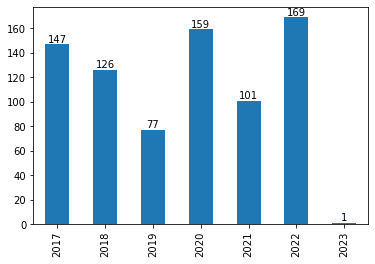

In [5]:
data['seendate'] = pd.to_datetime(data["seendate"])
ax = data['seendate'].dt.year.value_counts().sort_index().plot(kind="bar")
ax = ax.bar_label(ax.containers[0])

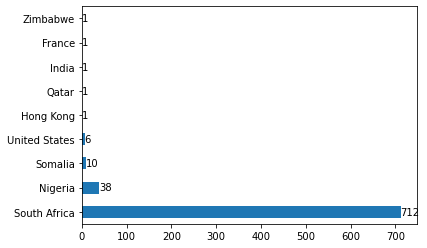

In [6]:
#Source of news
ax = data['sourcecountry'].value_counts().plot(kind="barh")
ax = ax.bar_label(ax.containers[0])

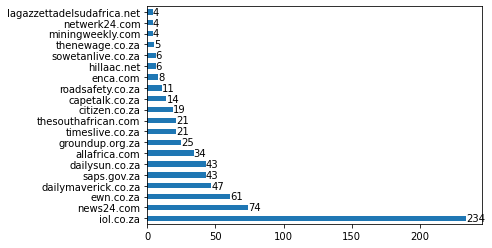

In [7]:
#top 20 domains
ax = data['domain'].value_counts().head(20).plot(kind="barh")
ax = ax.bar_label(ax.containers[0])

In [8]:
data.loc[data['sourcecountry'] != 'South Africa', 'domain'].value_counts()

allafrica.com           34
hillaac.net              6
groundup.org.za          4
wardheernews.com         3
snl24.com                2
4-traders.com            2
businesslive.co.za       2
africanews.com           2
7thspace.com             1
thecable.ng              1
afropages.fr             1
calcuttanews.net         1
menafn.com               1
africafeeds.com          1
msn.com                  1
bignewsnetwork.com       1
shabellenews.com         1
africaleader.com         1
humanitariannews.org     1
wn.com                   1
nehandaradio.com         1
Name: domain, dtype: int64

In [10]:
data.loc[data['domain'] == 'allafrica.com', 'sourcecountry'].value_counts()

Nigeria    34
Name: sourcecountry, dtype: int64

In [11]:
data.loc[data['domain'] == 'hillaac.net', 'sourcecountry'].value_counts()

Somalia    6
Name: sourcecountry, dtype: int64

In [40]:
tuple(data['url'])

('http://allafrica.com/stories/201701060673.html',
 'http://www.saps.gov.za/newsroom/msspeechdetail.php?nid=9848',
 'http://allafrica.com/stories/201703010657.html',
 'https://www.saps.gov.za/newsroom/msspeechdetail.php?nid=10525',
 'http://allafrica.com/stories/201702020630.html',
 'http://www.anc.org.za/content/anc-tg-programme-ahead-peoples-assembly',
 'http://www.saps.gov.za/newsroom/msspeechdetail.php?nid=10084',
 'http://www.saps.gov.za/newsroom/msspeechdetail.php?nid=9915',
 'http://allafrica.com/stories/201702200342.html',
 'https://www.saps.gov.za/newsroom/msspeechdetail.php?nid=10228',
 'http://www.enca.com/south-africa/four-killers-of-khayelitsha-woman-to-each-spend-life-behind-bars',
 'http://www.thenewage.co.za/police-on-the-ball-with-local-arrests/',
 'http://www.shabellenews.com/2017/03/four-somali-shopkeepers-killed-in-south-africa/',
 'http://www.iol.co.za/capetimes/news/fourth-somali-shopkeeper-killed-in-less-than-month-7967881',
 'http://www.news24.com/SouthAfrica/Lo

In [9]:
data['language'].value_counts()

English    779
Chinese      1
Name: language, dtype: int64

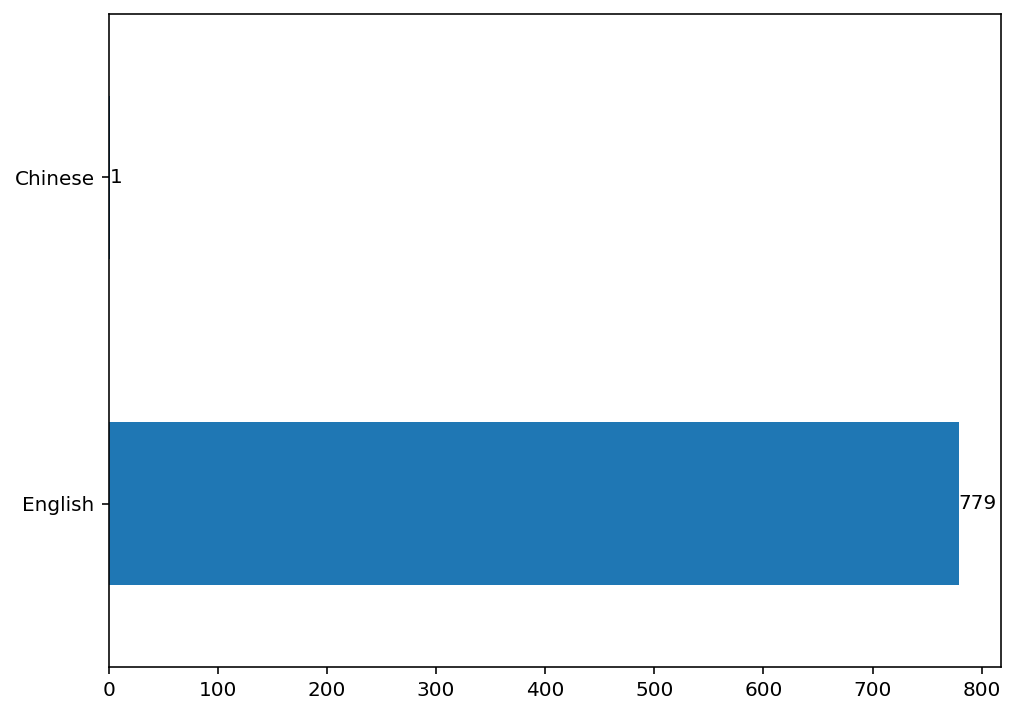

In [11]:
ax = data['language'].value_counts().plot(kind="barh")
ax = ax.bar_label(ax.containers[0])

In [13]:
data.loc[data['language'] == 'Chinese']

,domain,language,seendate,socialimage,sourcecountry,title,url,url_mobile
709,jobsvacancies.info,Chinese,20211211T083000Z,NaN,South Africa,三个主要指标中美国股市增加了12 ％， 同样的历史很高 ！ 市场或保持强烈的波动 _ 腾飞小说网,http://www.jobsvacancies.info/dia/rqqyf1z.html,NaN


In [15]:
data.loc[data['domain'] == 'jobsvacancies.info']

,domain,language,seendate,socialimage,sourcecountry,title,url,url_mobile
709,jobsvacancies.info,Chinese,20211211T083000Z,NaN,South Africa,三个主要指标中美国股市增加了12 ％， 同样的历史很高 ！ 市场或保持强烈的波动 _ 腾飞小说网,http://www.jobsvacancies.info/dia/rqqyf1z.html,NaN


In [17]:
data.loc[data['domain'] == 'allafrica.com', 'url']

0       http://allafrica.com/stories/201701060673.html
2       http://allafrica.com/stories/201703010657.html
4       http://allafrica.com/stories/201702020630.html
8       http://allafrica.com/stories/201702200342.html
20      http://allafrica.com/stories/201703010658.html
39      http://allafrica.com/stories/201703010694.html
42      http://allafrica.com/stories/201705100573.html
55      http://allafrica.com/stories/201706130150.html
67      http://allafrica.com/stories/201709180398.html
87      http://allafrica.com/stories/201711170324.html
88      http://allafrica.com/stories/201801080429.html
132    https://allafrica.com/stories/201812070528.html
140    https://allafrica.com/stories/201810220342.html
155    https://allafrica.com/stories/201904180692.html
161    https://allafrica.com/stories/201905150147.html
181    https://allafrica.com/stories/202003230894.html
196    https://allafrica.com/stories/202004160096.html
209    https://allafrica.com/stories/202004160949.html
213    htt

In [7]:
a1 = get_data1("Site C", "2023-01-01", "2023-03-23", "southafrica")

In [8]:
a1.loc[a1['domain'] == 'iol.co.za', 'title']

0     Khayelitsha man , 23 , stabbed to death allegedly by teen girls after breaking their gin bottle
2                                                     Eskom to split Khayelitsha load shedding blocks
3                                               New Western Cape College of Nursing students welcomed
6                            Over 2 700 learners prevented from attending school due to taxi blockade
7                                                          KDF says WCED not honest on Codeta dispute
11                                              Growing demand for affordable housing in Western Cape
13    Mayor Geordin Hill - Lewis in another impassioned call for president to devolve policing powers
15                                                           Crime that rocked and shocked us in 2022
Name: title, dtype: object

In [11]:
a2 = get_data1("Site C", "2022-01-01", "2022-03-01", "southafrica")

In [12]:
a2.loc[a2['domain'] == 'iol.co.za', 'title']

0    Armed escorts budget for City of Cape Town water and sanitation staff increased after recent robberies
1                  Custom - made wheelchairs set to change hundreds of lives following church huge donation
2                      MyCiTi N2 Express bus shareholders bickering over the discrepancy in station quality
Name: title, dtype: object

# Themes

In [1]:
from wordcloud import WordCloud
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()  
ps = PorterStemmer()
from string import punctuation
from collections import Counter
stoplist = stopwords.words('english') + list(punctuation)+['...']

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kritikagarg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kritikagarg/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
def get_data2(keyword, start_date, end_date, country, theme):
    dates = pd.date_range(start_date, end_date, freq='3MS').strftime("%Y-%m-%d").tolist()
    try: 
      dates.pop(0)
    except:
      print("check the input dates")
      raise
    if dates != []:
        all_res = []
        for date in dates: 
            set_filters = Filters(keyword = keyword, start_date = start_date, end_date = date, country = country, theme = theme)
            all_res.append(gd.article_search(set_filters))
            articles_df = pd.concat(all_res, ignore_index=True).drop_duplicates(ignore_index=True)
    if dates == []:
        set_filters = Filters(keyword = keyword, start_date = start_date, end_date = end_date, country = country)
        articles_df = gd.article_search(set_filters)
    return(articles_df)

In [8]:
df3 = get_data2("Site C", "2017-01-01", "2023-03-01", "southafrica", "SOC_GENERALCRIME")

In [9]:
len(df3)

386

In [10]:
df3 = df3.reindex(sorted(df3.columns), axis=1)
df3.head()

,domain,language,seendate,socialimage,sourcecountry,title,url,url_mobile
0,saps.gov.za,English,20170116T084500Z,,South Africa,Services,http://www.saps.gov.za/newsroom/msspeechdetail.php?nid=9915,
1,iol.co.za,English,20170228T073000Z,,South Africa,Fourth Somali shopkeeper killed in less than month,http://www.iol.co.za/capetimes/news/fourth-somali-shopkeeper-killed-in-less-than-month-7967881,
2,iol.co.za,English,20170228T153000Z,,South Africa,Four Somali shopkeepers killed in Khayelitsha in under a month,http://www.iol.co.za/news/crime-courts/four-somali-shopkeepers-killed-in-khayelitsha-in-under-a-month-7968895,
3,thenewage.co.za,English,20170116T081500Z,http://www.thenewage.co.za/wp-content/uploads/2017/01/court-image-2.jpg,South Africa,Police on the ball with local arrests,http://www.thenewage.co.za/police-on-the-ball-with-local-arrests/,
4,saps.gov.za,English,20170202T113000Z,,South Africa,Services,http://www.saps.gov.za/newsroom/msspeechdetail.php?nid=10084,


In [11]:
SAdata = data.loc[data['sourcecountry'] == 'South Africa']
SAdata = SAdata.where(pd.notnull(SAdata), '')
SAdata.head(1)

,domain,language,seendate,socialimage,sourcecountry,title,url,url_mobile
1,saps.gov.za,English,20170106T091500Z,,South Africa,Services,http://www.saps.gov.za/newsroom/msspeechdetail.php?nid=9848,


In [12]:
len(SAdata)

712

In [13]:
comm1 = pd.merge(df3, SAdata, how='inner')
len(comm1)

386

In [14]:
comm_counter = Counter([lemmatizer.lemmatize(i.lower()) for i in " ".join(comm1['title']).split() if i not in stoplist]).most_common()
comm_count = pd.DataFrame(comm_counter)
comm_count.head(20)

,0,1
0,khayelitsha,143
1,service,72
2,police,66
3,cape,66
4,shooting,52
5,murder,46
6,mass,43
7,town,38
8,suspect,37
9,sap,35


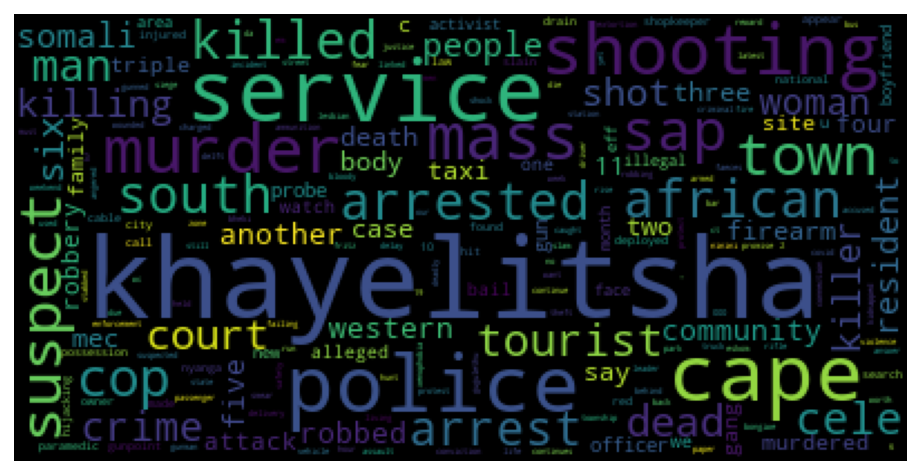

In [15]:
wordcloud = WordCloud().generate_from_frequencies(dict(comm_counter))
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [130]:
[i for i in comm1['title'] if "covid" in i.lower()]

['Health specialist mugged in Khayelitsha during Covid - 19 testing',
 'Western Cape has recorded 657 confirmed cases of Covid - 19 , 184 recoveries',
 'Western Cape Covid - 19 statistics : 14 April',
 'Khayelitsha Covid - 19 health facility damaged , paramedic ... ']

In [30]:
comm_count.tail(20)

,0,1
824,transfer,1
825,high,1
826,phelokazi,1
827,mqathanya,1
828,related,1
829,caution,1
830,politicising,1
831,bishop,1
832,lavis,1
833,abandon,1


In [34]:
[i for i in comm1['title'] if "art" in i.lower()]

['Cele urges community participation in fighting crime',
 'WATCH : Bheki Cele comforts partner of slain Khayelitsha police officer',
 'Art in a Khayelitsha fruit & veg shack',
 'Khayelitsha Site C residents angered , heartbroken by death of EFF activist',
 'State must partner with civil society to beat criminals , Khayelitsha residents tell Bheki Cele']

#### URLs not about crime

In [107]:
diff1 = pd.concat([df3, SAdata]).drop_duplicates(keep=False)
len(diff1)

326

In [108]:
diff1.head(5)

,domain,language,seendate,socialimage,sourcecountry,title,url,url_mobile
5,anc.org.za,English,20170208T114500Z,,South Africa,ANC TG Programme Ahead of the Peoples Assembly,http://www.anc.org.za/content/anc-tg-programme-ahead-peoples-assembly,
14,news24.com,English,20170131T201500Z,http://cdn.24.co.za/files/Cms/General/d/3853/5ea75d1259ad4531b1b5e1a4c2f4f47b.jpg,South Africa,Raising funds for sanitary pads,http://www.news24.com/SouthAfrica/Local/City-Vision/raising-funds-for-sanitary-pads-20160406,http://m.news24.com/news24/SouthAfrica/Local/City-Vision/raising-funds-for-sanitary-pads-20160406
21,iol.co.za,English,20170208T113000Z,https://irs.iol.co.za/image/1/process/803x452?source=https://inm-baobab-prod-eu-west-1.s3.amazonaws.com/public/inm/media/image/2017/02/03/31940840cd2emscapetown.jpg,South Africa,Plea to end attacks on paramedics,http://www.iol.co.za/capetimes/plea-to-end-attacks-on-paramedics-7664834,
24,iol.co.za,English,20170204T124500Z,,South Africa,Motives questioned as Somalis buried,http://www.iol.co.za/weekend-argus/news/motives-questioned-as-somalis-buried-7608918,
25,iol.co.za,English,20170119T230000Z,https://irs.iol.co.za/image/1/process/763x430?source=https://inm-baobab-prod-eu-west-1.s3.amazonaws.com/public/inm/media/file/1/2097091/1484857788/image/1977239325.jpg,South Africa,"Child , 7 , killed in shooting",http://www.iol.co.za/capetimes/child-7-killed-in-shooting-2097093,


In [119]:
diff_counter = Counter([lemmatizer.lemmatize(i.lower()) for i in " ".join(diff1['title']).split() if i not in stoplist]).most_common()
diff_count = pd.DataFrame(diff_counter)
diff_count.head(20)

,0,1
0,cape,76
1,khayelitsha,60
2,town,51
3,resident,20
4,city,17
5,covid,16
6,19,16
7,news,16
8,commuter,14
9,fire,13


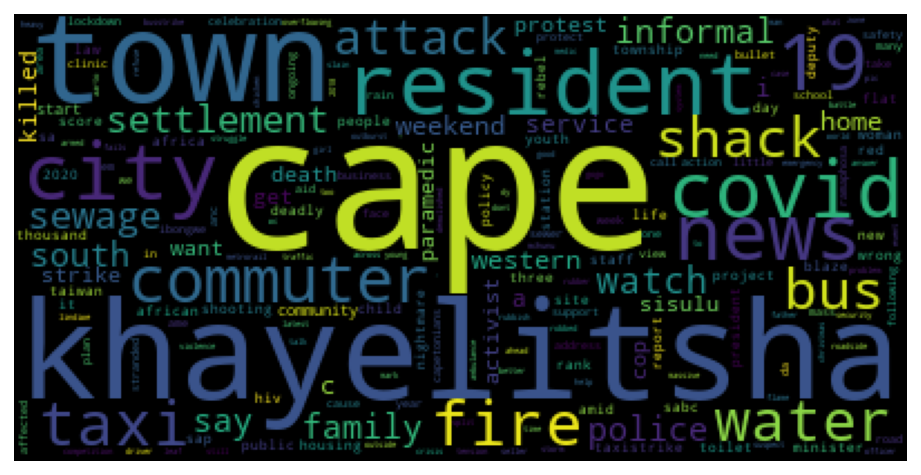

In [120]:
wordcloud = WordCloud().generate_from_frequencies(dict(diff_counter))
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [45]:
[i for i in diff1['title'] if "killed" in i.lower()]

['Child , 7 , killed in shooting',
 'Women still being killed after protests , Ramaphosa address',
 'Law enforcement officer killed by intruders in Khayelitsha home , paramedics robbed',
 'Codeta wants law enforcement at taxi ranks after taxi boss killed in Khayelitsha',
 'Well - known EFF activist shot and killed in Khayelitsha',
 'Scores of men picket outside post office where Uyinene was allegedly killed',
 'Hunt continues for gunmen who killed three people in Khayelitsha',
 '  They were each other best friend : Family mourns children killed in Taiwan shack fire']

#### Common terms

In [122]:
terms = pd.merge(comm_count, diff_count, how='inner')
len(terms)

92

In [124]:
terms.head(30)

,0,1
0,attack,10
1,family,9
2,c,9
3,law,5
4,protect,4
5,da,4
6,safety,4
7,armed,3
8,ct,3
9,to,3


## Different place

In [156]:
df4 = get_data1("chicago", "2023-01-01", "2023-03-01", "unitedstates")
len(df4)

250

In [157]:
df5 = get_data2("chicago", "2023-01-01", "2023-03-01", "unitedstates", "SOC_GENERALCRIME")
#df5 = df5.reindex(sorted(df5.columns), axis=1)
len(df5)

250

In [158]:
comm2 = pd.merge(df5, df4, how='inner')
len(comm2)

250

In [146]:
comm2.head()

,url,url_mobile,title,seendate,socialimage,domain,language,sourcecountry
0,http://www.washingtonexaminer.com/trump-chicago-needs-help/article/2615630,,Trump : Chicago needs help !,20170224T013000Z,http://cdn.washingtonexaminer.biz/cache/r960-dc0aa1dcbd1eeffb3a5a6589be8bb09b.jpg?v=2017.02.23,washingtonexaminer.com,English,United States
1,http://www.newsmax.com/US/donald-trump-chicago-twitter-violence/2017/02/23/id/775300/,,Trump : Chicago Needs Help !,20170224T011500Z,http://www.newsmax.com/CMSPages/GetFile.aspx?guid=247318ce-476d-4ee3-9967-e417104efe96&SiteName=Newsmax,newsmax.com,English,United States
2,http://lite987.com/tags/chicago/,,Chicago,20170306T170000Z,http://wac.450F.edgecastcdn.net/80450F/lite987.com/files/2015/12/logo4.png?w=250&zc=1&s=0&a=t&q=90,lite987.com,English,United States
3,https://patch.com/illinois/lincolnpark/12-year-old-charged-cop-shooting-life-abusive-grandma-actors-onstage-heart,https://patch.com/illinois/lincolnpark/amp/27124759/12-year-old-charged-in-cop-shooting-life-for-abusive-grandma-actors-onstage-heart-attack-scorpion-st,12,20170610T191500Z,https://cdn20.patchcdn.com/users/38195/20170610/011146/styles/T800x600/public/article_images/chicago_headlines_use-1497113949-9053.jpg,patch.com,English,United States
4,http://variety.com/2017/tv/news/chicago-nbc-1202422927/,http://variety.com/2017/tv/news/chicago-nbc-1202422927/amp/,"‘ Chicago Fire ,’ ‘ Chicago PD ,’ ‘ Chicago Med ’ Renewed by NBC , No Word on ‘ Justice ’",20170510T230000Z,https://pmcvariety.files.wordpress.com/2016/09/jon-seda-chicago-pd.jpg?&crop=1,variety.com,English,United States


In [164]:
df6 = get_data1("delhi", "2022-01-01", "2023-03-01", "india")
len(df6)

1000

In [165]:
df7 = get_data2("delhi", "2022-01-01", "2023-03-01", "india", "SOC_GENERALCRIME")
len(df7)

1000

In [167]:
comm3 = pd.merge(df6, df7, how='inner', on ='url')
len(comm3)

21

In [168]:
diff2 = pd.concat([df6, df7]).drop_duplicates(keep=False)
len(diff2)

1958

In [170]:
df6.head()

,url,url_mobile,title,seendate,socialimage,domain,language,sourcecountry
0,https://www.jagranjosh.com/articles/delhi-high-court-recruitment-2022-1645707481-2,https://m.jagranjosh.com/articles/amp/delhi-high-court-recruitment-2022-1645707481-2,"Delhi High Court Recruitment 2022 : दिल्ली न्यायिक सेवा में 168 पदों की निकली भर्ती , 12 मार्च तक करें आवेदन",20220224T163000Z,https://img.jagranjosh.com/images/2022/February/2422022/Delhi%20High%20Court.jpg,jagranjosh.com,Hindi,India
1,https://www.jagran.com/delhi/new-delhi-city-when-will-lakhs-of-metro-passengers-get-the-relief-from-delhi-metro-rail-corporation-common-man-issues-22458066.html,https://m.jagran.com/lite/delhi/new-delhi-city-ncr-when-will-lakhs-of-metro-passengers-get-the-relief-from-delhi-metro-rail-corporation-common-man-issues-22458066.html,"Delhi Metro Service News : When will lakhs of metro passengers get the discount , the youth of Delhi - NCR are asking",20220211T091500Z,https://www.jagranimages.com/images/newimg/11022022/11_02_2022-metrodelhipassender_22458066.jpg,jagran.com,Hindi,India
2,https://www.jagran.com/delhi/new-delhi-city-ncr-when-will-lakhs-of-metro-passengers-get-the-relief-from-delhi-metro-rail-corporation-common-man-issues-22458066.html,https://m.jagran.com/lite/delhi/new-delhi-city-ncr-when-will-lakhs-of-metro-passengers-get-the-relief-from-delhi-metro-rail-corporation-common-man-issues-22458066.html,"Delhi Metro Service News : When will lakhs of metro passengers get the discount , the youth of Delhi - NCR are asking",20220211T091500Z,https://www.jagranimages.com/images/newimg/11022022/11_02_2022-metrodelhipassender_22458066.jpg,jagran.com,Hindi,India
3,https://www.jagranjosh.com/articles/delhi-high-court-judicial-service-exam-2022-notification-download-1645681631-1,https://m.jagranjosh.com/articles/amp/delhi-high-court-judicial-service-exam-2022-notification-download-1645681631-1,Delhi High Court Recruitment 2022 : Apply Online for 168 Judicial Service Exam,20220224T073000Z,https://img.jagranjosh.com/images/2022/February/2422022/josh-article_high.jpg,jagranjosh.com,English,India
4,https://www.dailythanthi.com/News/TopNews/2022/02/07083423/Schools-for-std-9th-to-12th-reopen-in-Delhi-from-today.vpf,https://www.dailythanthi.com/amp/News/TopNews/2022/02/07083423/Schools-for-std-9th-to-12th-reopen-in-Delhi-from-today.vpf,"Schools for std 9th to 12th reopen in Delhi from today || டெல்லியில் மீண்டும் பள்ளி , கல்லூரிகள் திறக்கப்பட்டன",20220207T050000Z,,dailythanthi.com,Tamil,India
